Sales Prediction for Bigmart Outlet

Data:
    Collected from 2013
    files: train,test and submission

    train: 8523 rows and 12 columns
    test: 5681 rows and 11 columns
    submission: 5821 rows and 3 columns

    Type of Problem : Supervised learning

    Target column:

Understand more about the data

In [99]:
import pandas as pd
import numpy as np
import os


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

import warnings 
warnings.filterwarnings('ignore')



In [2]:
os.getcwd()

'/Users/bkannadasan/Documents/GitHub/DataScience/MachineLearning/Linear_regression_practice'

In [229]:
train = pd.read_csv('train_v9rqX0R.csv')

In [7]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [9]:
train.shape

(8523, 12)

In [10]:
test = pd.read_csv('test_AbJTz2l.csv')

In [11]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [17]:
test.shape

(5681, 11)

In [18]:
print(train.columns)
print(test.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [19]:
# find the difference in the columns b/w train and test
train.columns.difference(test.columns)

Index(['Item_Outlet_Sales'], dtype='object')

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [22]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Insighsts about the Data

Outlet-Information

1) Outlet_Establishment_Year - Age - Yes
2) Outlet_Size - Size - Yes
3) Outlet_Location_Type - Location - Yes
4) Brand - No
5) Advertisment - No
6) Outlet_Type - Type - Yes
7) Compitator - No

Product-Information

1) Item_MRP - Price - Yes
2) Item_Weight - Quantity - Yes
3) Quality - Yes
4) Item_Visibility - Advertisment - Yes
5) 

Descriptive Analytics

In [23]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [28]:
train.duplicated().sum()

np.int64(0)

In [29]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [32]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [33]:
train['Item_Fat_Content'].nunique()

5

In [34]:
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [35]:
specific_columns_with_less_uniqueness = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [38]:
for col in specific_columns_with_less_uniqueness:
    print(col,'=',train[col].nunique(),train[col].unique())
    print()

Item_Fat_Content = 5 ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Item_Type = 16 ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Outlet_Identifier = 10 ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

Outlet_Establishment_Year = 9 [1999 2009 1998 1987 1985 2002 2007 1997 2004]

Outlet_Size = 3 ['Medium' nan 'High' 'Small']

Outlet_Location_Type = 3 ['Tier 1' 'Tier 3' 'Tier 2']

Outlet_Type = 4 ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



Item_Fat_Content contains repeated info with different names (replace)
- We can impute with Low Fat & Regular 

Item_Type (16 Variables)
1) Drink
2) Foods
3) Others

Outlet_Identifier - 10
Outlet_Size - 3
Outlet_Location_Type - 3
Outlet_Type - 4


In [39]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Columns with Null values

Item_Weight

Outlet_Size


In [40]:
train['Item_Weight'].mean()

np.float64(12.857645184135976)

In [41]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [44]:
train[train['Item_Weight'].isna()].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680


In [47]:
train['Item_Identifier'][train['Item_Identifier']=='FDP10']

7       FDP10
585     FDP10
2623    FDP10
3382    FDP10
4585    FDP10
6087    FDP10
7883    FDP10
Name: Item_Identifier, dtype: object

In [55]:
train['Item_Weight'][train['Item_Identifier']=='FDP10']

7        NaN
585     19.0
2623    19.0
3382    19.0
4585    19.0
6087    19.0
7883    19.0
Name: Item_Weight, dtype: float64

In [54]:
train[train['Item_Identifier']=='FDP10']['Item_Weight'].mean()

np.float64(19.0)

In [57]:
train['Item_Weight'][train['Item_Identifier']=='DRI11']

18       NaN
1366     NaN
3127    8.26
5310    8.26
7022    8.26
7192    8.26
8483    8.26
Name: Item_Weight, dtype: float64

In [56]:
train[train['Item_Identifier']=='DRI11']['Item_Weight'].mean()

np.float64(8.26)

In [68]:
train.groupby('Item_Identifier').Item_Weight.mean()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [69]:
train.groupby('Item_Identifier').Item_Weight.transform(lambda x:x.fillna(x.mean()))

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [138]:
train['Item_Weight_1'] = train.Item_Weight.mean()

In [142]:
train['Item_Identifier'].value_counts() >5

Item_Identifier
FDW13     True
FDG33     True
NCY18     True
FDD38     True
DRE49     True
         ...  
FDY43    False
FDQ60    False
FDO33    False
DRF48    False
FDC23    False
Name: count, Length: 1559, dtype: bool

In [150]:
train['Item_Identifier'].value_counts()


Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [156]:
train['Item_Identifier'].value_counts()[train['Item_Identifier'].value_counts() <2]

Item_Identifier
FDK57    1
FDN52    1
FDT35    1
FDE52    1
FDY43    1
FDQ60    1
FDO33    1
DRF48    1
FDC23    1
Name: count, dtype: int64

In [83]:
train['Item_Weight_2'] = train.groupby('Item_Identifier').Item_Weight.transform(lambda x:x.fillna(x.mean()))

In [84]:
train.isna().head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_1,Item_Weight_2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [85]:
train['Item_Weight_1']

0       12.857645
1       12.857645
2       12.857645
3       12.857645
4       12.857645
          ...    
8518    12.857645
8519    12.857645
8520    12.857645
8521    12.857645
8522    12.857645
Name: Item_Weight_1, Length: 8523, dtype: float64

In [86]:
train['Item_Weight_2']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight_2, Length: 8523, dtype: float64

In [87]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_1,Item_Weight_2
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,12.857645,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12.857645,5.92


In [125]:
train.drop(columns='Item_Weight_new2',inplace=True)

In [89]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_1,Item_Weight_2,Item_Weight_new2
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,12.857645,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12.857645,5.92,5.92


In [93]:
train[train['Item_Weight'].isna()].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_1,Item_Weight_2,Item_Weight_new2
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,12.857645,19.00,19.00
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,12.857645,8.26,8.26


EDA

In [96]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Weight_1', 'Item_Weight_2',
       'Item_Weight_new2'],
      dtype='object')

In [97]:
train.Item_Outlet_Sales

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

/var/folders/8b/_vkggsks1pvdn519cywyj0_40000gn/T/ipykernel_44541/2094790428.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Item_Outlet_Sales'])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

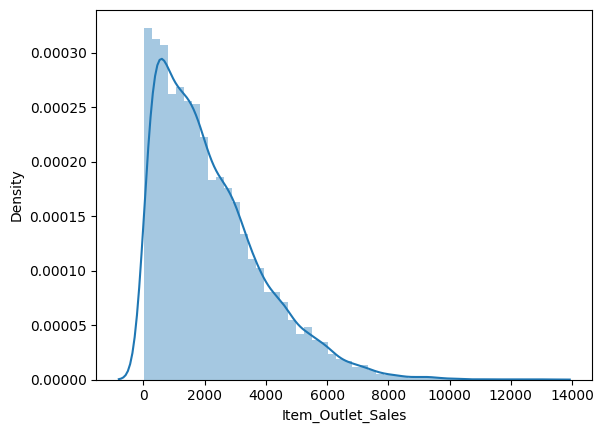

In [98]:
sns.distplot(train['Item_Outlet_Sales'])

<Axes: >

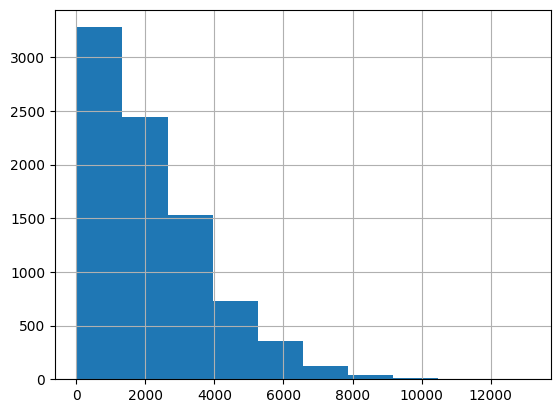

In [101]:
train['Item_Outlet_Sales'].hist()

<Axes: ylabel='Frequency'>

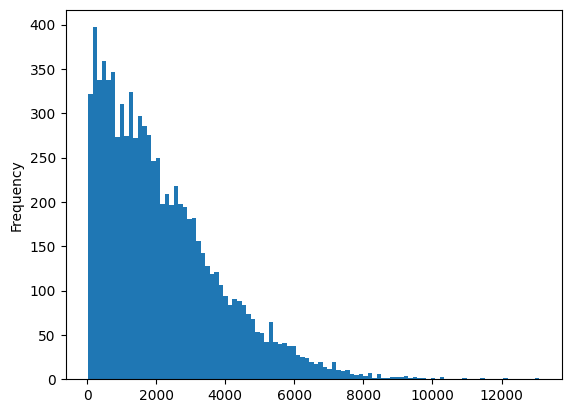

In [105]:
train['Item_Outlet_Sales'].plot(kind='hist',bins=100)

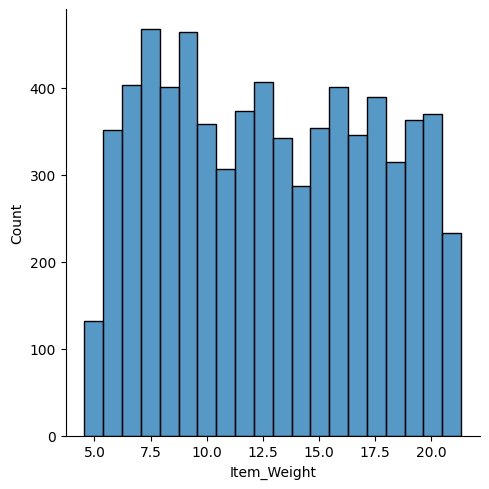

In [106]:
sns.displot(train['Item_Weight'])

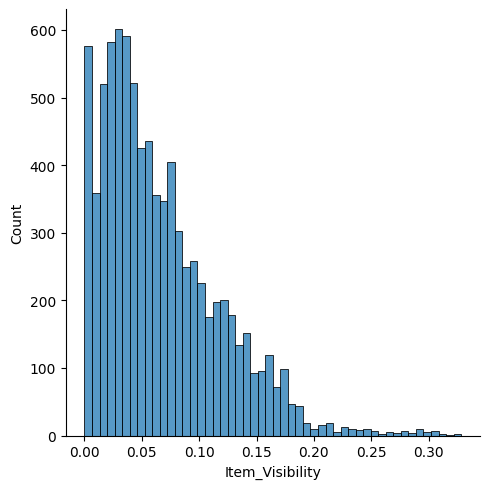

In [110]:
sns.displot(train['Item_Visibility'])
#lots of items are not showcased

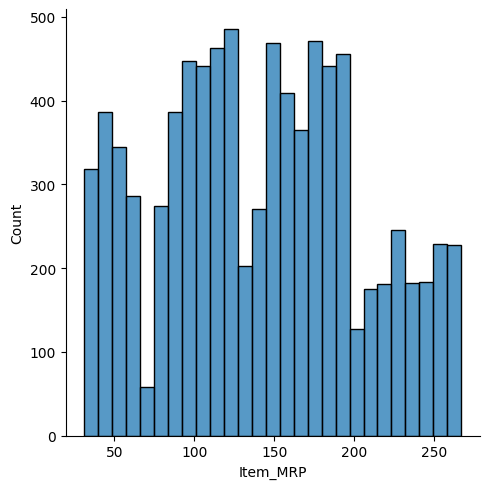

In [111]:
sns.displot(train['Item_MRP'])

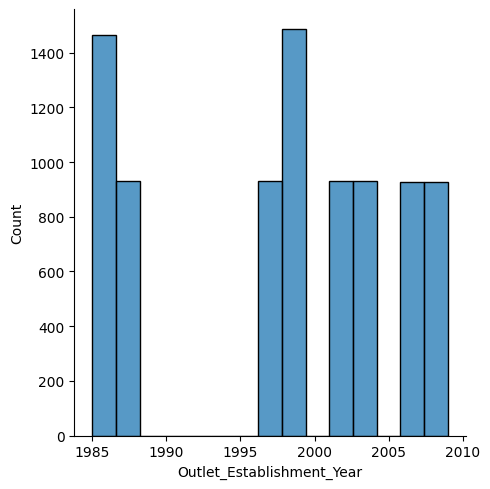

In [113]:
sns.displot(train['Outlet_Establishment_Year'])
#Plot expalins there are no shops opened b/w 1990-1995

In [115]:
train['Outlet_Establishment_Year'].value_counts().sort_index()
#Give exact info, expalins there are no shops opened b/w 1-1995

Outlet_Establishment_Year
1985    1463
1987     932
1997     930
1998     555
1999     930
2002     929
2004     930
2007     926
2009     928
Name: count, dtype: int64

In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Weight_1              8523 non-null   float64
 13  Item_Weight_2              8519 non-null   float

In [127]:
train.select_dtypes(include=np.number).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Weight_1',
       'Item_Weight_2'],
      dtype='object')

In [128]:
num_columns = train.select_dtypes(include=np.number).columns

Item_Weight


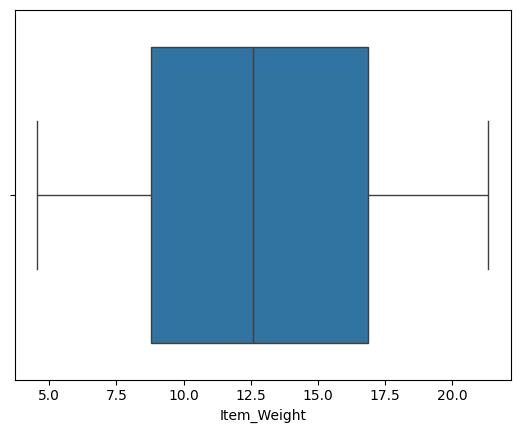

Item_Visibility


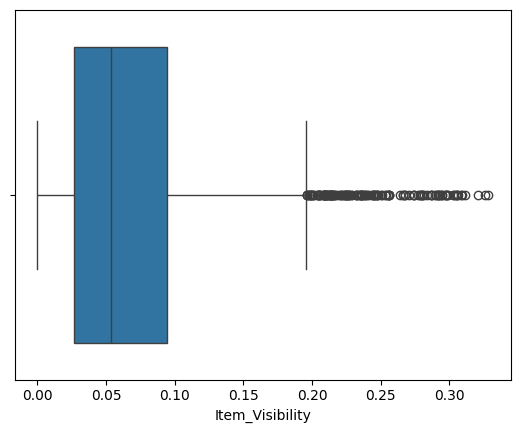

Item_MRP


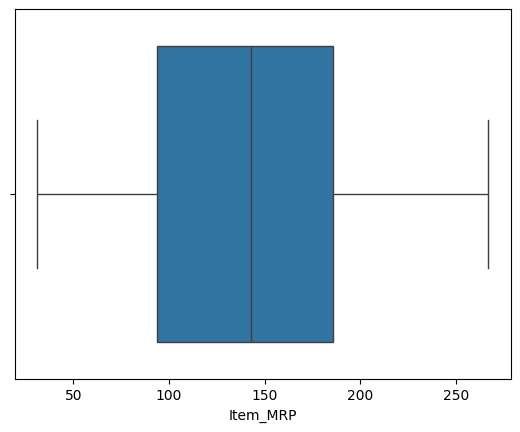

Outlet_Establishment_Year


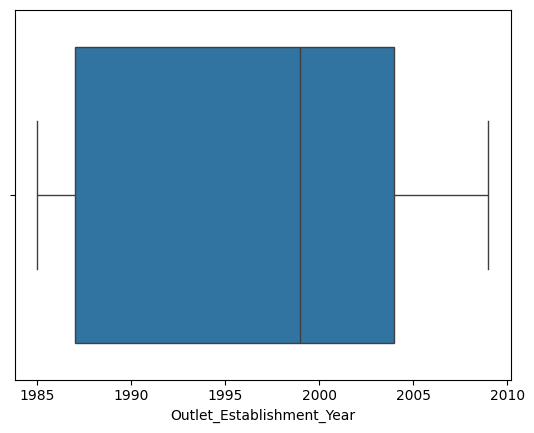

Item_Outlet_Sales


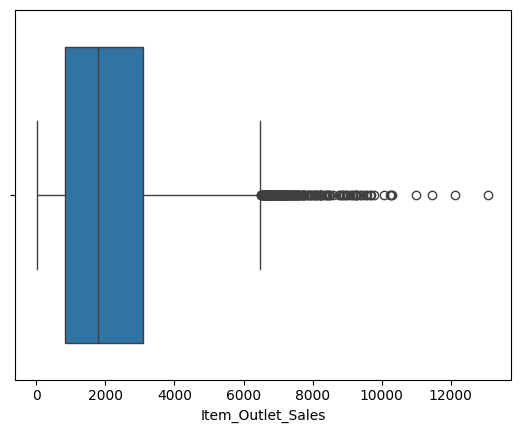

Item_Weight_1


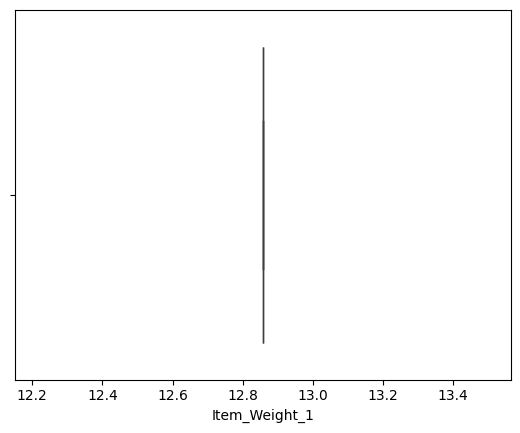

Item_Weight_2


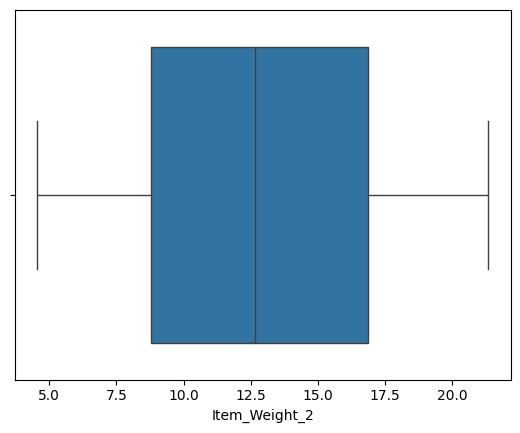

In [129]:
for col in num_columns:
    print(col)
    sns.boxplot(train,x=col)
    plt.show()

In [162]:
num_columns=train.select_dtypes(include=np.number).drop(columns=['Item_Outlet_Sales']).columns

In [168]:
category_cols = train.select_dtypes(exclude=np.number).columns

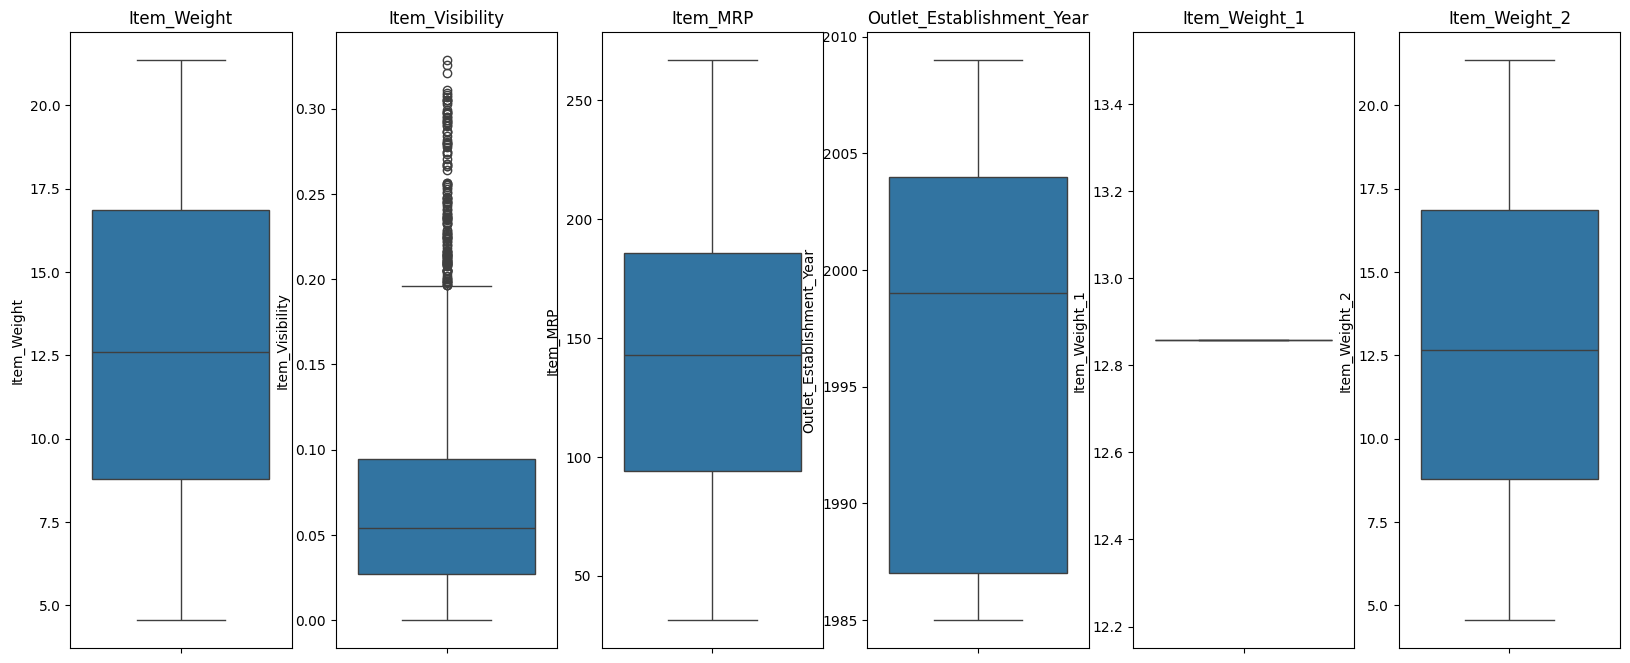

In [166]:
fig,ax=plt.subplots(nrows=1,ncols=6,figsize=(20,8))


for i,col in enumerate(num_columns):
    sns.boxplot(train,y=col,ax=ax[i])
    ax[i].set_title(col)
plt.show()



In [169]:
category_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

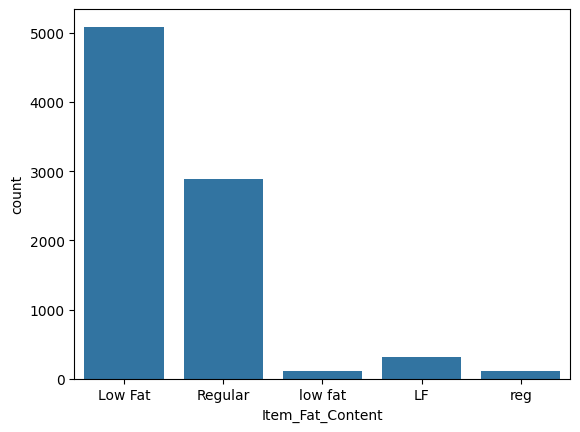

In [170]:
sns.countplot(train,x='Item_Fat_Content')

<Axes: xlabel='count', ylabel='Item_Type'>

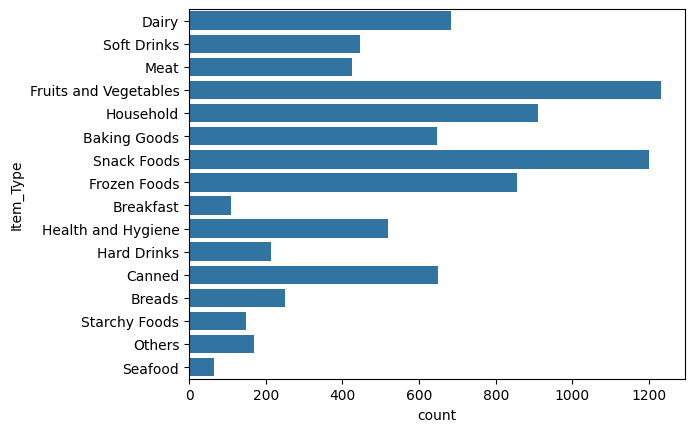

In [172]:
sns.countplot(train,y='Item_Type')

In [177]:
train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

<Axes: ylabel='count'>

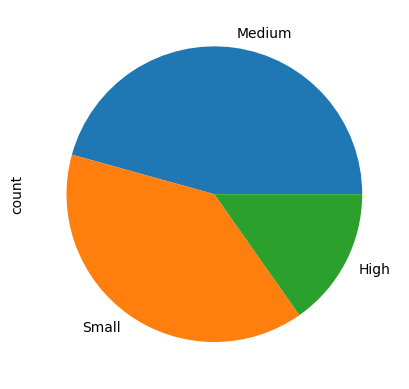

In [174]:
train['Outlet_Size'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

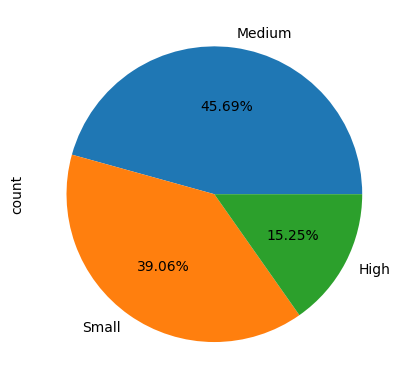

In [179]:
train['Outlet_Size'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [180]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Weight_1', 'Item_Weight_2'],
      dtype='object')

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

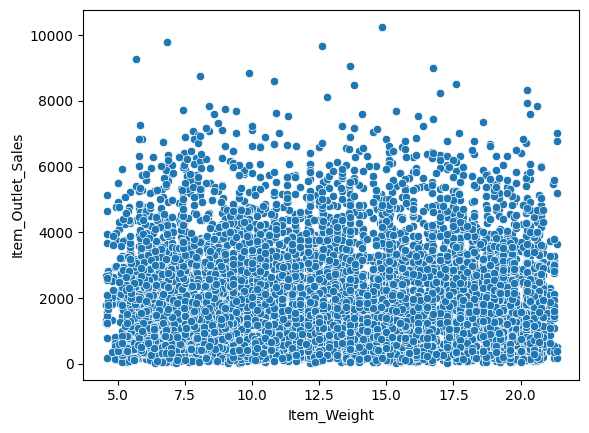

In [181]:
sns.scatterplot(data=train,x='Item_Weight',y='Item_Outlet_Sales')

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

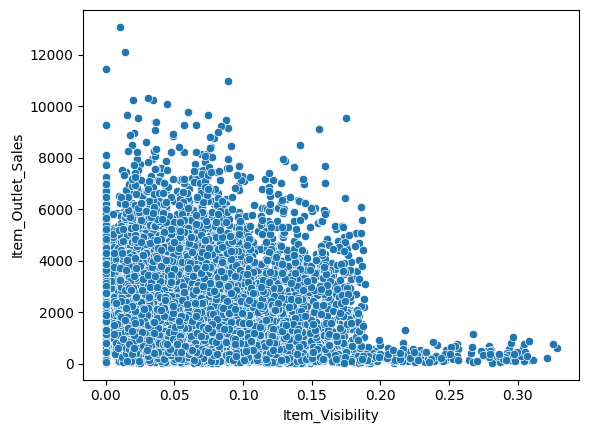

In [183]:
sns.scatterplot(data=train,x='Item_Visibility',y='Item_Outlet_Sales')

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

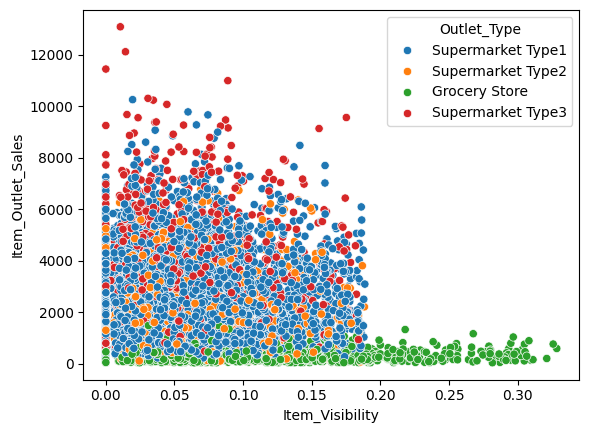

In [184]:
sns.scatterplot(data=train,x='Item_Visibility',y='Item_Outlet_Sales',hue='Outlet_Type')

In [189]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_1,Item_Weight_2
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,12.857645,9.300
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12.857645,5.920
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,12.857645,17.500
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,12.857645,19.200
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,12.857645,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,12.857645,6.865
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,12.857645,8.380
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,12.857645,10.600
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,12.857645,7.210


<Axes: >

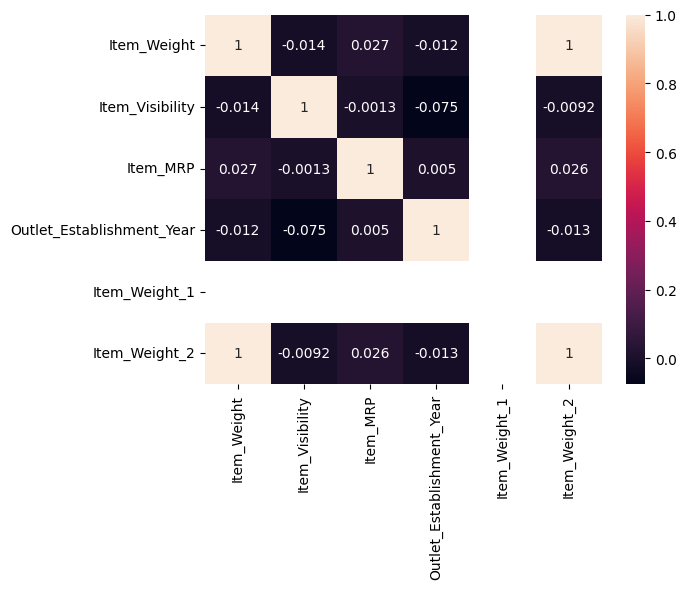

In [186]:
sns.heatmap(train[num_columns].corr(),annot=True)

<Axes: >

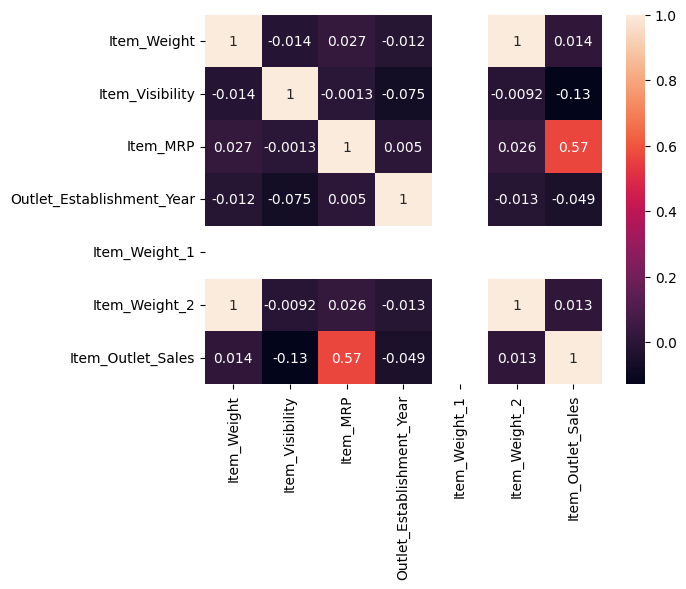

In [191]:
sns.heatmap(pd.concat([train[num_columns],train['Item_Outlet_Sales']],axis=1).corr(),annot=True)



<Axes: >

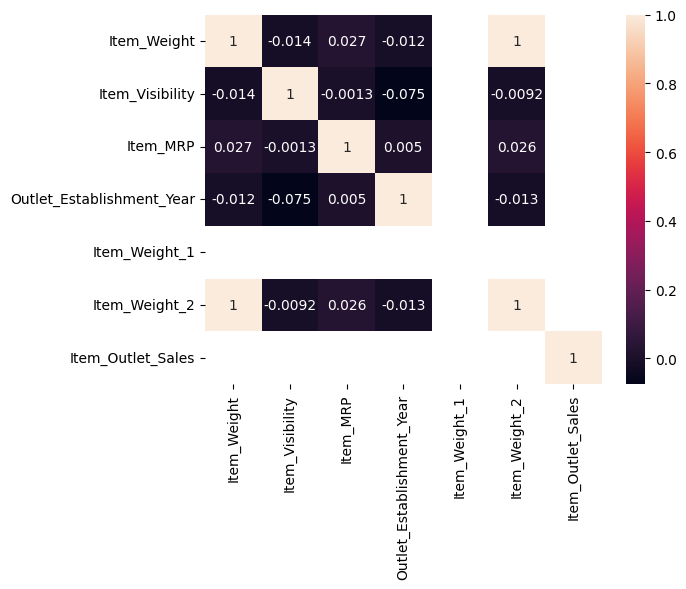

In [192]:
sns.heatmap(pd.concat([train[num_columns],train['Item_Outlet_Sales']]).corr(),annot=True)



In [194]:
train['age_of_outlet'] = 2024 - train['Outlet_Establishment_Year'] 

In [196]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_1,Item_Weight_2,age_of_outlet
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,12.857645,9.300,25
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12.857645,5.920,15
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,12.857645,17.500,25
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,12.857645,19.200,26
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,12.857645,8.930,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,12.857645,6.865,37
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,12.857645,8.380,22
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,12.857645,10.600,20
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,12.857645,7.210,15


Base Line Model

In [200]:
train = pd.read_csv('train_v9rqX0R.csv')

In [203]:
submission = pd.read_csv('sample_submission_8RXa3c6.csv')

In [204]:
submission.columns

Index(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], dtype='object')

In [202]:
#Mean taken from historical data
mean_sales = train['Item_Outlet_Sales'].mean()
mean_sales

np.float64(2181.288913575032)

In [206]:
#Define a dataframe for submission

base_model = test[['Item_Identifier','Outlet_Identifier']]
base_model['Item_Outlet_Sales'] = mean_sales

In [207]:
base_model

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2181.288914
1,FDW14,OUT017,2181.288914
2,NCN55,OUT010,2181.288914
3,FDQ58,OUT017,2181.288914
4,FDY38,OUT027,2181.288914
...,...,...,...
5676,FDB58,OUT046,2181.288914
5677,FDD47,OUT018,2181.288914
5678,NCO17,OUT045,2181.288914
5679,FDJ26,OUT017,2181.288914


In [210]:
base_model.to_csv('submission_by_base_modelling.csv',index=False)

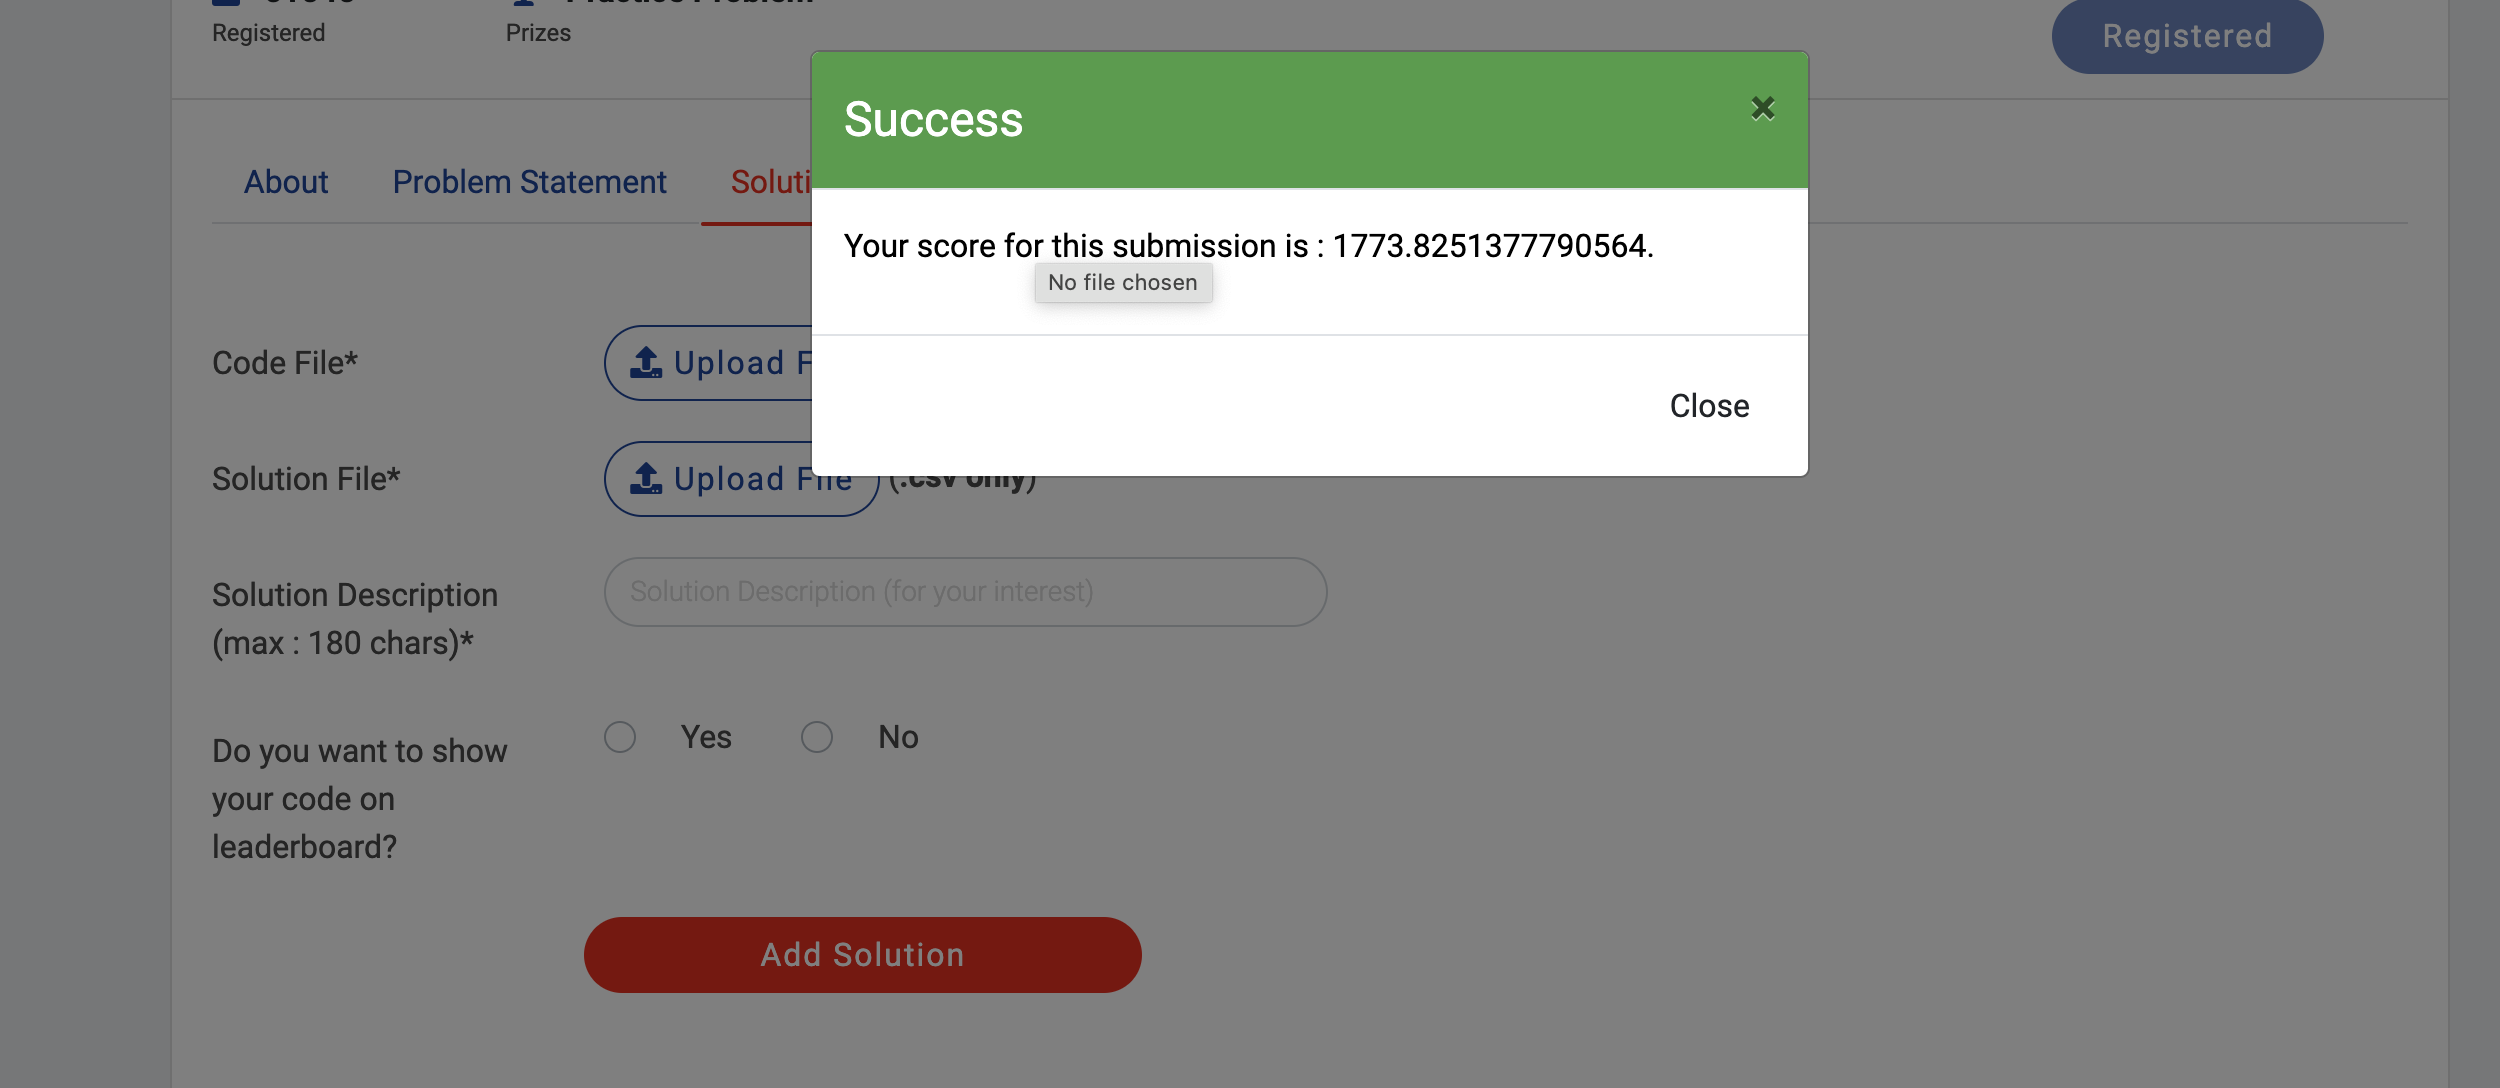

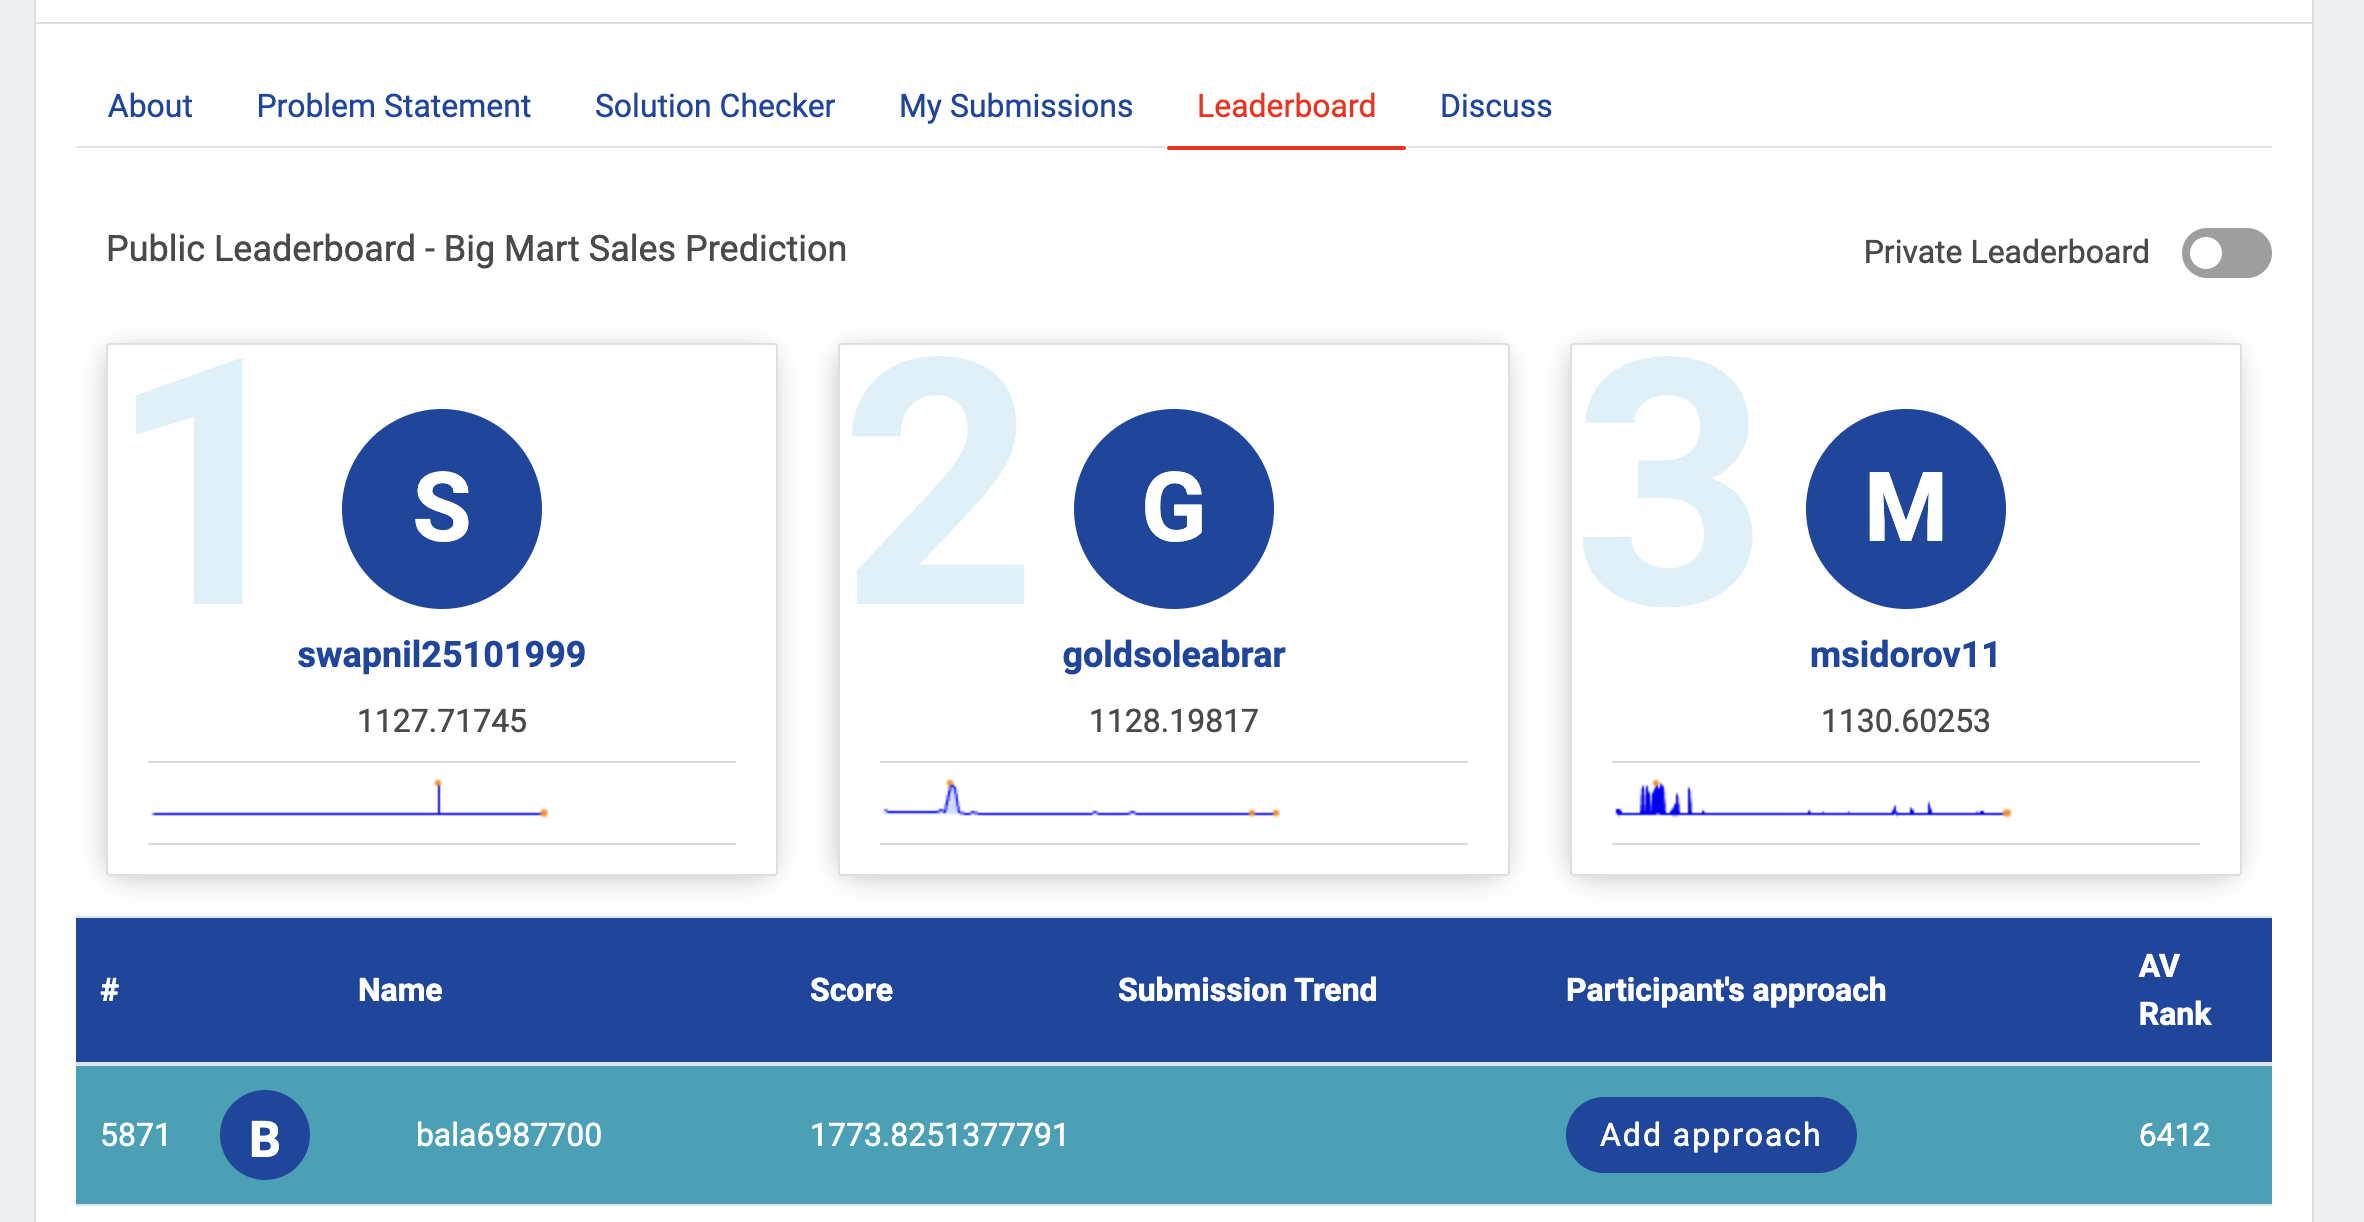

In [213]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [214]:
train['Item_Weight'].mean()

np.float64(12.857645184135976)

In [272]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)

In [274]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [225]:
train['Outlet_Size'].mode()[0]

'Medium'

In [227]:
train['Outlet_Size'].mode().values[0]

'Medium'

In [275]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace=True)

In [276]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [224]:
train.duplicated().sum()

np.int64(0)

In [226]:
cat_cols = train.select_dtypes(include='object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [228]:
cat_cols = train.select_dtypes(include='object').drop(columns='Item_Identifier').columns
cat_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [230]:
num_columns=train.select_dtypes(exclude='object').drop(columns='Item_Outlet_Sales').columns
num_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [232]:
train[num_columns].head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.30,0.016047,249.8092,1999
1,5.92,0.019278,48.2692,2009


In [280]:
train[cat_cols].head(2)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2


In [278]:
#Convert categorical colums into numerical by encoding
preprocessed_cat_train_cols = pd.get_dummies(train[cat_cols],dtype='int')

In [279]:
preprocessed_cat_train_cols.head()

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [281]:
train[cat_cols].nunique()

Item_Fat_Content         5
Item_Type               16
Outlet_Identifier       10
Outlet_Size              3
Outlet_Location_Type     3
Outlet_Type              4
dtype: int64

In [282]:
preprocessed_cat_train_cols.columns

Index(['Item_Fat_Content_LF', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Fat_Content_low fat',
       'Item_Fat_Content_reg', 'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1',
     

In [283]:
train[num_columns].head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.30,0.016047,249.8092,1999
1,5.92,0.019278,48.2692,2009
2,17.50,0.016760,141.6180,1999
3,19.20,0.000000,182.0950,1998
4,8.93,0.000000,53.8614,1987


In [284]:
from sklearn.preprocessing import StandardScaler

In [285]:
scaler = StandardScaler()

In [286]:
preprocessed_numeric_train_cols = scaler.fit_transform(train[num_columns])

In [287]:
preprocessed_numeric_train_cols

array([[-0.84187169, -0.97073217,  1.74745381,  0.13954076],
       [-1.64170589, -0.90811123, -1.48902325,  1.33410274],
       [ 1.09855449, -0.95691733,  0.01004021,  0.13954076],
       ...,
       [-0.53424315, -0.59978449, -0.89720755,  0.73682175],
       [-1.33644372,  1.53287976, -0.60797692,  1.33410274],
       [ 0.45963367, -0.41193591, -1.05226104, -0.09937163]])

In [288]:
preprocessed_numeric_train_cols = pd.DataFrame(scaler.fit_transform(train[num_columns]),columns=num_columns)

In [289]:
preprocessed_numeric_train_cols.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,-0.841872,-0.970732,1.747454,0.139541
1,-1.641706,-0.908111,-1.489023,1.334103
2,1.098554,-0.956917,0.010040,0.139541
3,1.500838,-1.281758,0.660050,0.020085
4,-0.929428,-1.281758,-1.399220,-1.293934


In [296]:
train_preprocessed = pd.concat([preprocessed_cat_train_cols,preprocessed_numeric_train_cols,train['Item_Outlet_Sales']],axis=1)
train_preprocessed.head(2)

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,-0.841872,-0.970732,1.747454,0.139541,3735.1380
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,-1.641706,-0.908111,-1.489023,1.334103,443.4228


In [299]:
train_preprocessed['Item_Weight'].isna().sum()

np.int64(0)

In [300]:
X=train_preprocessed.drop(columns='Item_Outlet_Sales')
y=train_preprocessed['Item_Outlet_Sales']

In [301]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [302]:
train_X,val_X,train_y,val_y = train_test_split(X,y,test_size=0.2,random_state=42)
train.shape,train_X.shape,val_X.shape,train_y.shape,val_y.shape

((8523, 12), (6818, 45), (1705, 45), (6818,), (1705,))

In [303]:
model = LinearRegression()

In [293]:
model

LinearRegression()

In [304]:
model.fit(train_X,train_y)

LinearRegression()

In [305]:
train_X.isna().sum()

Item_Fat_Content_LF                0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Fat_Content_low fat           0
Item_Fat_Content_reg               0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Identifier_OUT010           0
Outlet_Identifier_OUT013           0
Outlet_Identifier_OUT017           0
Outlet_Identifier_OUT018           0
Outlet_Identifier_OUT019           0
Outlet_Identifier_OUT027           0
O

In [306]:
pred_train_y = model.predict(train_X)

In [307]:
from sklearn.metrics import mean_squared_error

In [309]:
print('Train RMSE:',mean_squared_error(train_y,pred_train_y))

Train RMSE: 1304597.3403503606


In [311]:
print('Train RMSE:',mean_squared_error(train_y,pred_train_y,squared=False))

Train RMSE: 1142.1897129419265


In [312]:
pred_test_y = model.predict(val_X)

In [313]:
print('Test RMSE:',mean_squared_error(val_y,pred_test_y))

Test RMSE: 1145274.8202942193


In [315]:
print('Test RMSE:',mean_squared_error(val_y,pred_test_y,squared=False))

Test RMSE: 1070.1751353373052


In [316]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

############ Part-2

In [317]:
#Using pipeline to fit & predict

In [318]:
train = pd.read_csv('train_v9rqX0R.csv')

In [320]:
category_columns_to_encode = train.select_dtypes(include='object').drop(columns='Item_Identifier').columns
category_columns_to_encode

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [321]:
num_cols = train.select_dtypes(exclude='object').drop(columns='Item_Outlet_Sales').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [325]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer


In [323]:
cat_pipe_encode = Pipeline(steps=[
    ('impute_cat',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder())
    ])

In [324]:
num_pipe_encode = Pipeline(steps=[
    ('impute_num',SimpleImputer(strategy='mean')),
    ('scale',StandardScaler())
    ])

In [326]:
preprocess = ColumnTransformer(
    transformers=[('num_encode',num_pipe_encode,num_cols),
                  ('cat_encode',cat_pipe_encode,category_columns_to_encode)]
)

In [327]:
model_pipeline = Pipeline(steps=[
    ('Preprocessing',preprocess),
    ('lin_reg',LinearRegression())
])

In [328]:
model_pipeline

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))])),
                ('lin_reg', LinearRegression())])

In [336]:
X=train.drop(columns='Item_Outlet_Sales')
y=train['Item_Outlet_Sales']

In [337]:
X.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [338]:
train_X,val_X,train_y,val_y = train_test_split(X,y,test_size=0.2,random_state=42)
train.shape,train_X.shape,val_X.shape,train_y.shape,val_y.shape

((8523, 12), (6818, 11), (1705, 11), (6818,), (1705,))

In [339]:
model_pipeline.fit(train_X,train_y)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))])),
                ('lin_reg', LinearRegression())])

In [342]:
pred_train_y = model_pipeline.predict(train_X)

In [343]:
pred_test_y = model_pipeline.predict(val_X)

In [344]:

print('Train MSE:',mean_squared_error(train_y,pred_train_y))
print('Train RMSE:',mean_squared_error(train_y,pred_train_y,squared=False))

Train RMSE: 1302776.1740238692
Train RMSE: 1141.392208674945


In [346]:

print('Test MSE:',mean_squared_error(val_y,pred_test_y))
print('Test RMSE:',mean_squared_error(val_y,pred_test_y,squared=False))

Test MSE: 1143863.8696732607
Test RMSE: 1069.515717356814


In [353]:
y_sub = model_pipeline.predict(test)

In [354]:
pd.DataFrame(y_sub).head(5)

,0
0,1841.142777
1,1350.729838
2,1878.772498
3,2591.066962
4,5115.877232


In [347]:
submission.head(2)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000


In [355]:
submission['Item_Outlet_Sales'] = y_sub

In [356]:
submission.head(2)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1841.142777
1,FDW14,OUT017,1350.729838


In [359]:
submission['Item_Outlet_Sales']<0

0       False
1       False
2       False
3       False
4       False
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Outlet_Sales, Length: 5681, dtype: bool

In [360]:
submission[submission['Item_Outlet_Sales']<0]

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
30,NCR42,OUT019,-1359.808378
37,FDD48,OUT010,-70.646987
41,FDY19,OUT010,-59.032654
46,FDR14,OUT010,-1197.435696
112,FDO38,OUT010,-683.400968
...,...,...,...
5478,FDV14,OUT019,-568.302720
5514,DRJ25,OUT010,-1209.085970
5580,FDA23,OUT010,-303.281652
5583,NCG18,OUT019,-251.773952


In [362]:
orig_submission= submission

In [361]:
neg_Sales = submission[submission['Item_Outlet_Sales']<0]

In [363]:
orig_submission[orig_submission['Item_Outlet_Sales']<0]

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
30,NCR42,OUT019,-1359.808378
37,FDD48,OUT010,-70.646987
41,FDY19,OUT010,-59.032654
46,FDR14,OUT010,-1197.435696
112,FDO38,OUT010,-683.400968
...,...,...,...
5478,FDV14,OUT019,-568.302720
5514,DRJ25,OUT010,-1209.085970
5580,FDA23,OUT010,-303.281652
5583,NCG18,OUT019,-251.773952


In [365]:
orig_submission.to_csv('submission_results.csv')

In [371]:
submission.loc[[submission['Item_Outlet_Sales']<0]]['Item_Outlet_Sales']=0

KeyError: "None of [Index([(False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, ...)], dtype='object')] are in the [index]"

In [373]:
submission.loc[submission['Item_Outlet_Sales']<0,'Item_Outlet_Sales'] = 0

In [380]:
submission.to_csv('submission_results_with_zero.csv',index=False)

In [381]:
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1841.142777
1,FDW14,OUT017,1350.729838
2,NCN55,OUT010,1878.772498
3,FDQ58,OUT017,2591.066962
4,FDY38,OUT027,5115.877232
...,...,...,...
5676,FDB58,OUT046,2313.104190
5677,FDD47,OUT018,2479.647079
5678,NCO17,OUT045,1875.686805
5679,FDJ26,OUT017,3609.172967


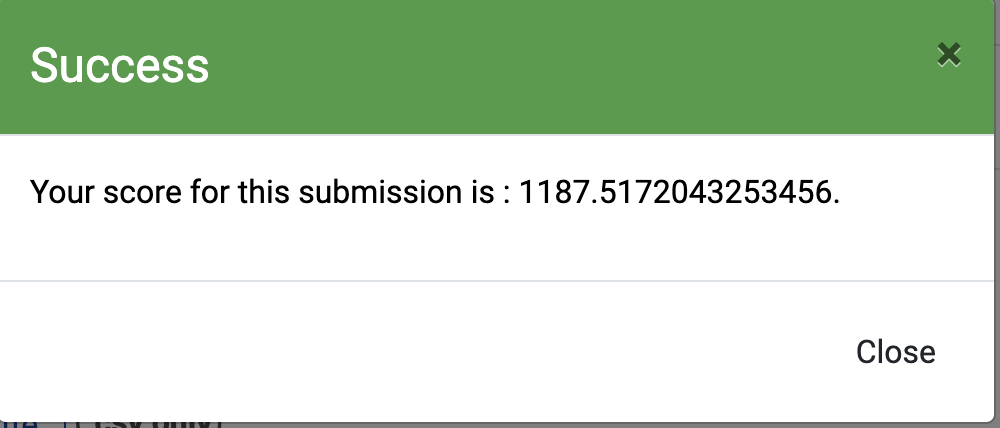

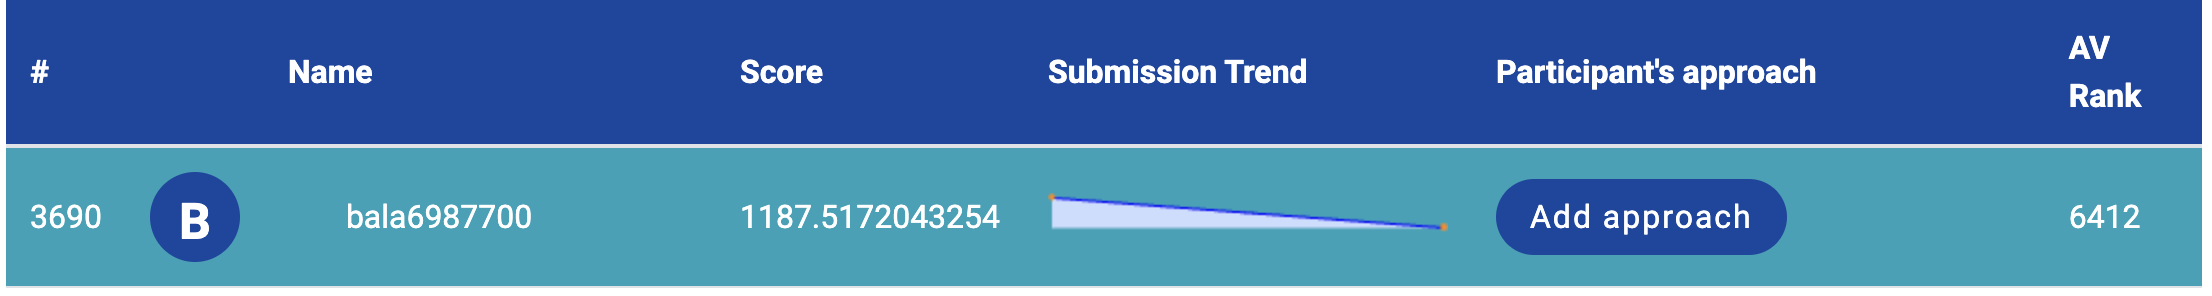

In [ ]:
model_pipeline = Pipeline(steps=[
    ('Preprocessing',preprocess),
    ('lin_reg',LinearRegression())
])